# Housing

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### Load the data

In [2]:
housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Getting information about the dataset

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


###### Notice that the total_bedrooms attribute has only 20433 null values, meaning that 207 districts are missing this feature.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded data from a CSV file you know that it must be a text attribute. When you looked upp at the top five rows, you probably noticed that the values in the ocean_proximity column were repeative, which means that it is a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary of the numerical attributes

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5545F8048>,
      dtype=object)

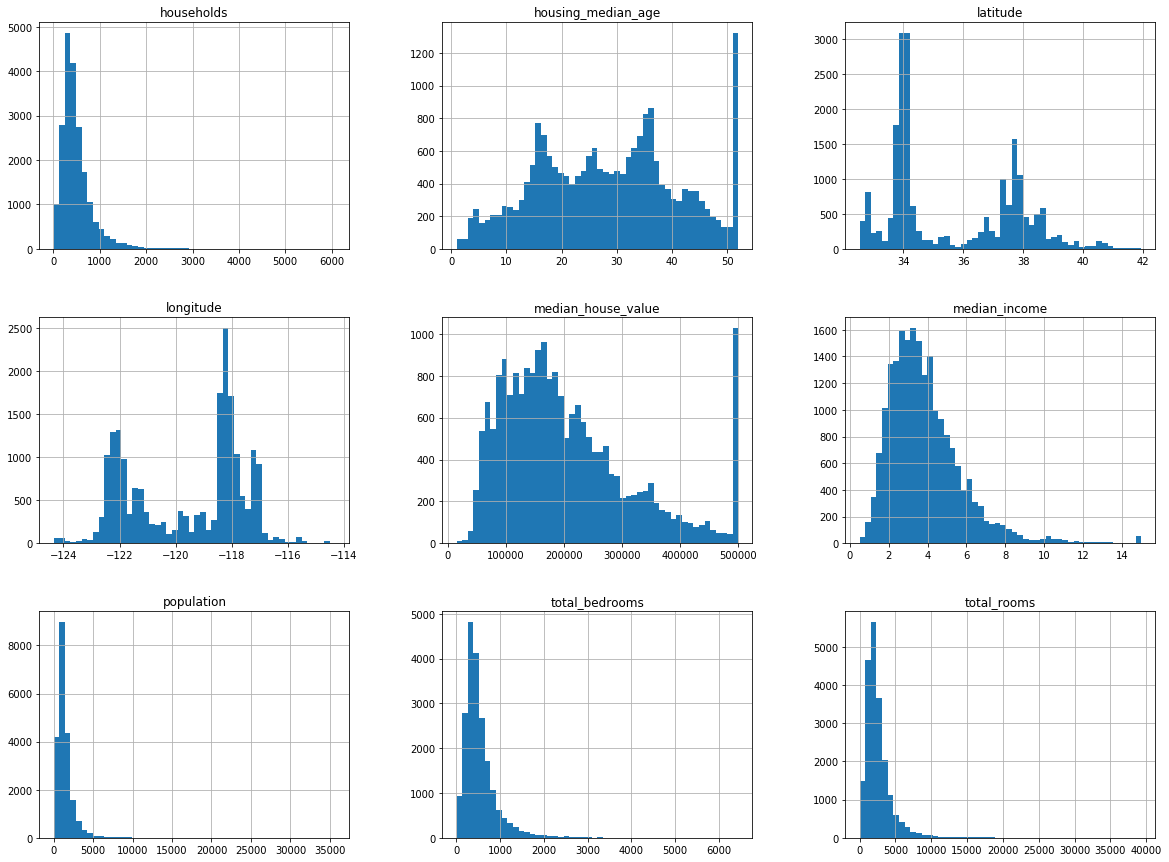

In [6]:
housing.hist(bins=50, figsize=(20, 15))

### Splitting of data into train set and test set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


First there is a random_state parameter that allows you to set the random generator see as explained previously, and second you can pass it multiple data sets with an identical number of rows, it will split them on same indices.

###### When you estimate the generalisation error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

If your dataset is not large enough , we run the risk of introducing a significant sampling bias. When a survey is company decides to call 1000 people to ask them a few question, they don't just pick 1000 people randomly in a phonebook. They try to ensure that these people are representative of the whole poplulation.

It is important to have a sufficient number of instances of each starum should be large enough.
The following code uses the pd.cut() function to create an income category attribute with 5 categories(labeled from 1 to 5): category 1 ranges from 0 to 1.5(i.e less than $15,000), category 2 fromm 1.5 to 3 and so on.

In [9]:
housing["income_cat"]=pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

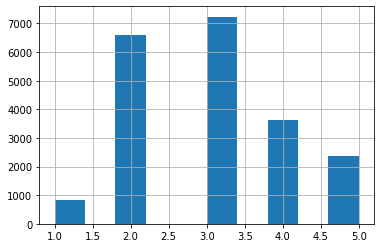

In [10]:
housing["income_cat"].hist()

###### StratifiedShuffleSplit Class:

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Now we should remove the income_cat attribute so the data is back to its original state:

In [13]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

Let's create a copy so you can play with it without harming the training set.

In [14]:
housing=strat_train_set.copy()

### Visualizing Geographical Data

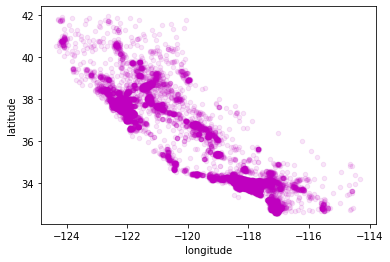

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, color='m')

The radius of each circle represents the district's population(option s), and the color represents the price(option c). We will use a defined color map(option cmap) called jet, which ranges from blue(low values) to red(high prices):

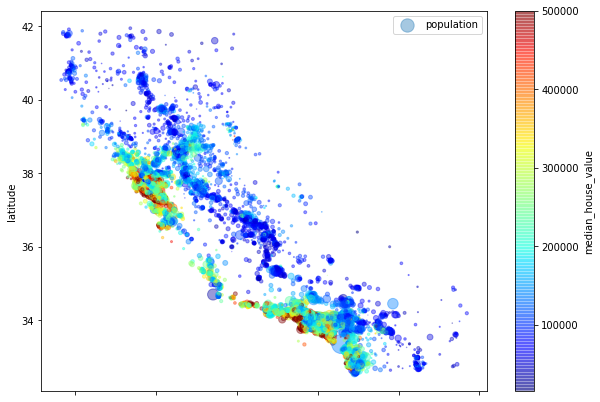

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, marker="o", s=housing["population"]/100, label="population", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

This image tells you that the housing prices are very much related to the location(e.g., close to the ocean) and to the population density, as you probably knew already. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in costal districts are not too high, so it is not a simple rule.

## Looking for Correlations

In [17]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


Now let's look at how much each attribute correlates with the median house value:

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong correlation; for example the median house value tends to go up when the median income goes up. When the coefficient is -1, it means thatthere is a strong negative correlation; you can see a small negative correlation between lattitude and the median house value(i.e, prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there us no linear correlation.

Another way to check correlation between attributes is to use Pandas' scatter_matrix function, which plot every numerical atttribute against every other numerical attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E555486550>,
      dtype=object)

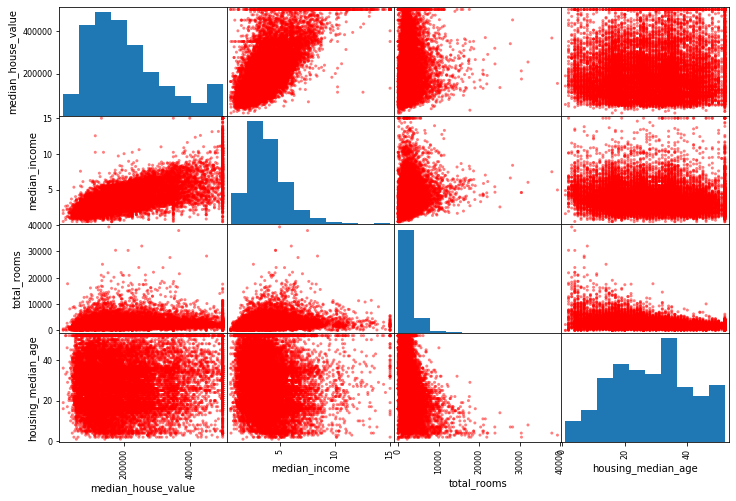

In [19]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), color='red')

The main diagonal(top left to bottom right) would be full of straight lines if pandas plotted each variable against itself which would not be very useful. So instead Pandas displays a histogram of each attribute. 

###### The most promising attribute to predict to predict the median housing value is the median income, so let's zoom in on their correlation scatterplot:

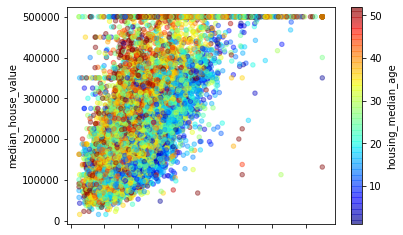

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4, c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True)

## Experimenting with Attribute  Combinations 

Some attributes have a tail-heavy distribution, so you may want to transform them(e.g., by computing their logarithm).

One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. WHat you really want is the number of rooms per household. Similarly, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number  of bedrooms by itself is not very useful: you probably want to compare it to the numberr of rooms. And the population for household also seems like an interesting attribute combination to look at. Let's create these new attributes:

In [21]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total  number of rooms or bedrooms. Apparently houses with lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district-obviously the larger the houses, the more expensive they are.

This round of exploration does not have to be absolutely through; the point is to start off on the foot and quicklly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you analyze its output to gain more insights and come back to this exploration step.

## Prepare the Data for Machine Learning Algorithms

First let's revert to a clean training set(by copying strat_train_set once again), and let's separate the prdictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target values(note that drop() creates a copy of the data and does not affect the strat_train_set):

In [23]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleaning

Most machine learning algorithms cannot work with missing features.

Fixing:
    
    > Get rid of the corresponding districts.
    
    > Get rid of the whole attribute.
    
    > Set the values to some value(zero, the mean, the median, etc.)

In [24]:
c=housing.dropna(subset=["total_bedrooms"])  #option 1
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16354 non-null float64
latitude              16354 non-null float64
housing_median_age    16354 non-null float64
total_rooms           16354 non-null float64
total_bedrooms        16354 non-null float64
population            16354 non-null float64
households            16354 non-null float64
median_income         16354 non-null float64
ocean_proximity       16354 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [25]:
m=housing.drop("total_bedrooms", axis=1)   #option 2
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [26]:
median=housing["total_bedrooms"].median()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [27]:
e=housing["total_bedrooms"].fillna(median)
e

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. FIrst, you need to create a SimpleImputer instance, specifying that you want to replace each attribute's missing values with the median of that attribute:

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
impute=SimpleImputer(strategy="mean")

In [30]:
housing_num=housing.drop("ocean_proximity", axis=1)

In [31]:
impute.fit(housing_num)
impute.statistics_

array([-119.57583394,   35.63957728,   28.65310078, 2622.7283188 ,
        534.97389018, 1419.7908188 ,  497.06038033,    3.87558937])

In [32]:
housing_num.mean().values

array([-119.57583394,   35.63957728,   28.65310078, 2622.7283188 ,
        534.97389018, 1419.7908188 ,  497.06038033,    3.87558937])

Now you can use this "trained" imputer to transform the training set by replacing missing values by the learned medians:

In [33]:
X=impute.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it's simpe:

In [34]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Handling Text and Categorical Attributes

In [36]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
ordinal_encoder=OrdinalEncoder()

In [39]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded=pd.DataFrame(housing_cat_encoded, columns=["ocean_proximity"])
housing_cat_encoded.head()

,ocean_proximity
0,0.0
1,0.0
2,4.0
3,1.0
4,0.0


In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases(e.g., for ordered categories such as "bad", "average", "good", "excellent"), but it is obviously not the case for the ocean_proximity coloumn(for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create a binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN"(and 0 otherwise), another attribute equal to 1 when the category is "INLAND"(and 0 otherwise), and so on. This  is called one-hot encoding, because only one attribute will be equal to 1(hot), while the others will be 0(cold). The new attributes are sometime called dummy attributes.


In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of NumPy array. This is very useful when you have categorical attributes with thousands of columns, and the matrix is full of zeros except for a single 1 per row.  

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix= 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:, rooms_ix]/X[:, households_ix]
        population_per_household=X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [45]:
housing_extra_attribs=pd.DataFrame(housing_extra_attribs)
housing_extra_attribs.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In this example the transformer has one hyperparameter, add_bedrooms_per_room set to True by default(it is often helpful to provide sensible defaults). This hyperparameter will allow you to find out whether adding this attribute  helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you cam automatically try out, making it much more likely that you will find a great combination(and saving you a lot of time).

## Feature Scalling

One of the most important transformations you need to apply to your dat ais feature scalling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. There are two most common ways to get all the attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (many people call this normalisation) is quite simple:values are shifted and rescaled so that they end up ranging from 0to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don't want 0-1 for some reason.
    
Standardadization is quite different: first it subtracts the mean value(so standardization does not bound values to a specific range, which may be a problem for some algorithms(e.g. neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. Forr examples suppose a district has a median income equal to 100(by mistake). Min-max scaling would then crush all the other values from 0-15 down to 0-0.15, wheareas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

## Transformation Pipelines

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr=num_pipeline.fit_transform(housing_num)
columns=list(housing_num.columns)
columns.extend(['rooms_per_household', 'population_per_household', 'bedrooms_per_room'])
housing_num_tr=pd.DataFrame(housing_num_tr, columns=columns)


In [47]:
housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.156043,0.771950,0.743331,-0.493234,-0.447944,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.134997
1,-1.176025,0.659695,-1.165317,-0.908967,-1.039606,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.788193
2,1.186849,-1.342183,0.186642,-0.313660,-0.155765,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.383467
3,-0.017068,0.313576,-0.290520,-0.362762,-0.399248,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.192503
4,0.492474,-0.659299,-0.926736,1.856193,2.410540,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.241700


In [48]:
housing_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
rooms_per_household         16512 non-null float64
population_per_household    16512 non-null float64
bedrooms_per_room           16512 non-null float64
dtypes: float64(11)
memory usage: 1.4 MB


In [49]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers(i.e, they must have a fit_transform() method). THe names can be anything(as long as they are unique and don't contain double underscores "__"): they will come in handy later for hypertparameter tuning.

When you call the pipeline's fit method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter of the next call, until it reaches the final estimator, for which  it just calls the fit() method.

It is more convenient to have a single transformer  able to handle all columns applying the appropiate transformations to each  column.

In [50]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)
columns=list(housing_num.columns)
cat=OneHotEncoder()
categ=cat.fit_transform(housing[cat_attribs])
categ.toarray()
cat_=cat.categories_
cat_=np.array(cat_)
cat_.tolist()
columns.extend(["rooms_per_household", 'population_per_household', 'bedrooms_per_room'])
columns.extend(cat_[0])
columns
new_housing_prepared=pd.DataFrame(housing_prepared, columns=columns)

In [51]:
new_housing_prepared.head(9)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.447944,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.134997,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.039606,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.788193,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.155765,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.383467,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.399248,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.192503,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.410540,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.241700,1.0,0.0,0.0,0.0,0.0
5,-0.696456,0.945009,-0.370047,0.143693,0.129109,0.025285,0.194138,-0.176435,-0.114867,-0.048003,-0.195120,0.0,1.0,0.0,0.0,0.0
6,0.537433,-0.748168,1.856709,-0.182253,-0.530728,-0.583328,-0.585720,2.366702,1.003599,-0.027646,-1.031775,1.0,0.0,0.0,0.0,0.0
7,1.166867,-0.696718,-0.210993,-0.272040,-0.589164,-0.433639,-0.324880,1.115239,0.000891,-0.051831,-1.009041,0.0,1.0,0.0,0.0,0.0
8,0.657325,-0.771554,1.459074,-0.354345,-0.170374,0.444770,-0.157197,-1.076906,-0.452724,0.110319,0.498003,1.0,0.0,0.0,0.0,0.0


###### Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns  a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e, the ratio of non-zero cells), and it returns a sparse matrix if the density is lower than a given threshold(by default, sparse_threshold=0.3)

## Splitting the Data into Train and Test Set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(housing_prepared, housing_labels)

## Select and Train a Model

### Training and Evaluating on the Training Set

In [61]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.fit_transform(some_data)
new_daata=pd.DataFrame(some_data_prepared)

In [63]:
new_daata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.104558,1.005337,1.471960,-0.461133,-0.433153,-0.580076,-0.438242,-0.431107,-0.462235,-0.921520,0.428810,1.0,0.0,0.0
1,-1.126153,0.868245,-1.245505,-0.888339,-0.924545,-0.851253,-0.916710,1.935761,1.712042,-0.122950,-1.781490,1.0,0.0,0.0
2,1.427396,-1.576551,0.679366,-0.276603,-0.190490,-0.428378,-0.177837,-0.330567,-1.091283,-1.010571,1.023694,0.0,0.0,1.0
3,0.126328,0.445547,0.000000,-0.327060,-0.392709,-0.076654,-0.408603,-0.953420,0.491609,1.735629,-0.355290,0.0,1.0,0.0
4,0.676987,-0.742578,-0.905822,1.953134,1.940898,1.936362,1.941392,-0.220667,-0.650133,0.319412,0.684277,1.0,0.0,0.0


### Evaluation Of the model

In [86]:
housing_predictions=reg.predict(X_test)

In [113]:
comparisions=pd.DataFrame(y_test.tolist())
comparisions[1]=housing_predictions
comparisions.tail()

,0,1
4123,70100.0,89424.436530
4124,273000.0,233529.595473
4125,57100.0,120758.744952
4126,123000.0,198811.096047
4127,77200.0,138405.612904


In [159]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(np.array(y_test), housing_predictions)

In [161]:
from math import sqrt
sqrt(score)

69686.23268428499

In [162]:
from sklearn.tree import DecisionTreeRegressor
trees=DecisionTreeRegressor()
trees.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [164]:
scores=mean_squared_error(np.array(y_test), trees.predict(X_test))
np.sqrt(scores)

72257.59441753988

Here we can see that the decision tree perform worse than the linear regression.
Now let's do a better evaluation using Cross-Validation

## Cross-Validation

In [185]:
trees=DecisionTreeRegressor()
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(trees, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse=np.sqrt(-cv_score)

In [187]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
   
display_scores(rmse)

Scores: [69508.84415682 66113.47612328 70281.12976903 70828.48591749
 72031.95801316 75436.16689381 70057.6398255  72439.10498142
 77580.70100499 69536.67915623]
Mean: 71381.41858417349
Standard deviation: 3071.5397600874494


In [191]:
lin_scores=cross_val_score(reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse=np.sqrt(-lin_scores)
display_scores(rmse)

Scores: [66991.93077833 67048.67926539 70444.05577272 74774.02214626
 68102.64264448 71319.00743013 65085.0968163  68353.36278098
 71773.08099554 67789.05273148]
Mean: 69168.09313616122
Standard deviation: 2721.508666429823


In [207]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train, y_train)
forest_score=cross_val_score(forest, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse=np.sqrt(-forest_score)
display_scores(rmse)

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [51942.92620972 49942.70553874 52380.16265029 55524.07083712
 52135.47222228 55180.53241814 51286.99810001 49648.17833504
 56299.23309315 52739.79197115]
Mean: 52708.00713756385
Standard deviation: 2167.7372798377774


###### You can save any model in pickle or sklearn.externals.joblib

In [208]:
import pickle
pickle.dump(forest, open('myforest.pkl', 'wb'))
my_model=pickle.load(open('myforest.pkl', 'rb'))

In [221]:
my_model.feature_importances_

array([5.55604021e-02, 5.47460550e-02, 4.53011467e-02, 1.42476359e-02,
       1.12695171e-02, 1.17859519e-02, 1.10882695e-02, 4.78952060e-01,
       2.82690337e-02, 1.26702671e-01, 2.33760491e-02, 1.23364557e-03,
       1.34534370e-01, 7.65047501e-05, 1.05182678e-03, 1.80486026e-03])

See the model is reloaded with the previously fitted Regressor

###### Now to select the hyperparameters in an effective way let's jump into the Grid Search.

## Grid Search

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [225]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [226]:
grid_search.cv_results_

{'mean_fit_time': array([0.0620697 , 0.20337873, 0.63047128, 0.09441733, 0.36976662,
        1.12045684, 0.13524513, 0.50219336, 1.41251249, 0.16903129,
        0.56464052, 1.72642946, 0.10497947, 0.35684142, 0.1277267 ,
        0.42750273, 0.16506014, 0.5119493 ]),
 'std_fit_time': array([0.00362945, 0.0047722 , 0.02530475, 0.00268537, 0.03992697,
        0.06520992, 0.00454263, 0.04048007, 0.1438495 , 0.0047945 ,
        0.0158934 , 0.05478756, 0.00842848, 0.02384395, 0.0043216 ,
        0.01239305, 0.01520844, 0.00569231]),
 'mean_score_time': array([0.00478811, 0.00899415, 0.02565742, 0.00461645, 0.01683064,
        0.02594767, 0.00379057, 0.00939131, 0.02500496, 0.00459647,
        0.00959711, 0.02656584, 0.0041883 , 0.01058974, 0.00439548,
        0.01137714, 0.0040041 , 0.00999408]),
 'std_score_time': array([4.19716319e-04, 1.99657761e-03, 8.60141846e-04, 7.96679375e-04,
        1.35786660e-02, 1.53028672e-03, 3.99089070e-04, 1.18069544e-03,
        2.31335325e-05, 4.95432293e-